# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
  Dataset Data Science Salaries 2023 diambil dari sumber Kaggle https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
   
2. **Tentang Dataset**:
   - Dataset Data Science Salaries ini berisi informasi tentang gaji profesional di bidang data science dari berbagai negara dan perusahaan.
   - Dataset ini tidak memiliki label/kategori target
   - Jumlah entri: 3.755 baris data, sehingga cukup untuk analisis clustering
   - Jumlah kolom: 11 kolom (work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size)

# **2. Import Library**

In [363]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [364]:
#Load dataset
file_path = '/content/Dataset_clustering.csv'
df = pd.read_csv(file_path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [365]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [366]:
#informasi dataset
df.info()
print('-'*50)
duplicated_rows = df.duplicated().sum()
print(f'Jumlah baris duplikat: {duplicated_rows}')
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
--------------------------------------------------
Jumlah baris duplikat: 1171
--------------------------------------------------


In [367]:
#mengelompokkan kolom berdasarkan data type
dtype = df.dtypes

column_by_dtype = {}
for column, dtype in dtype.items():
    if dtype == 'object':
        column_by_dtype['object'] = column_by_dtype.get('object', []) + [column]
    else:
        column_by_dtype['numeric'] = column_by_dtype.get('numeric', []) + [column]

print('Kolom kategorikal : ', column_by_dtype['object'])
print('Kolom numerikal : ', column_by_dtype['numeric'])

Kolom kategorikal :  ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Kolom numerikal :  ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


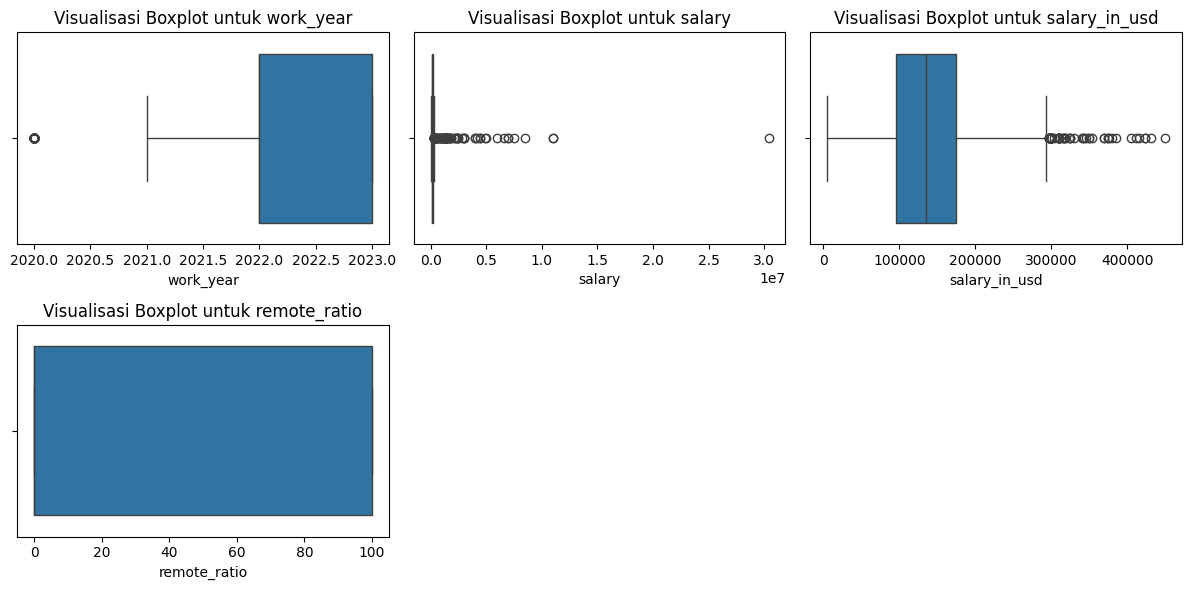

In [368]:
# Menampilkan boxplot untuk mendeteksi outlier pada semua kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for idx, kolom in enumerate(kolom_numerik, 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(data=df, x=kolom)
    plt.title(f'Visualisasi Boxplot untuk {kolom}')
plt.tight_layout()
plt.show()

In [369]:
# Memeriksa kemungkinan kesalahan penulisan di kolom kateforikal
kolom_kategorikal = df.select_dtypes(include=['object']).columns

for kolom in kolom_kategorikal:
    nilai_unik = df[kolom].unique()
    print(f"Nama Kolom: {kolom}")
    print(f"Nilai Unik: {nilai_unik}\n")

Nama Kolom: experience_level
Nilai Unik: ['SE' 'MI' 'EN' 'EX']

Nama Kolom: employment_type
Nilai Unik: ['FT' 'CT' 'FL' 'PT']

Nama Kolom: job_title
Nilai Unik: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Ap

In [370]:
# analisis korelasi antara fitur dan target
def analisis_korelasi(dataframe, kolom_target, kolom_fitur):
    hasil_korelasi = {}

    for fitur in kolom_fitur:
        korelasi, _ = pearsonr(dataframe[kolom_target], dataframe[fitur])
        hasil_korelasi[fitur] = korelasi

        plt.figure(figsize=(10, 6))
        plt.scatter(dataframe[fitur], dataframe[kolom_target])
        plt.xlabel(fitur)
        plt.ylabel(kolom_target)
        plt.title(f'Scatter Plot: {fitur} vs {kolom_target}\nKoefisien Korelasi Pearson: {korelasi:.2f}')
        plt.show()

    return hasil_korelasi

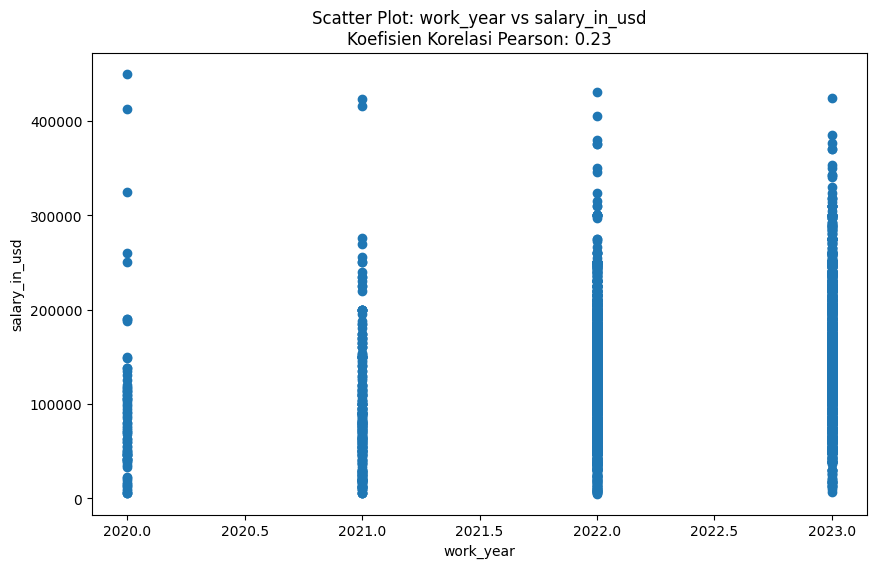

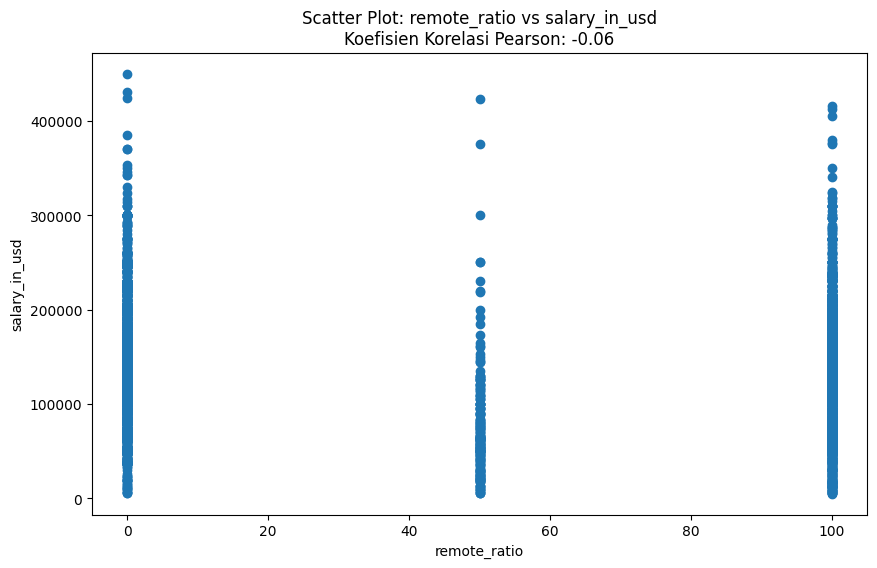

Matriks Korelasi:
{'work_year': np.float64(0.2282900224328786), 'remote_ratio': np.float64(-0.06417098519057553)}


In [371]:
target_column = 'salary_in_usd'
feature_columns = ['work_year', 'remote_ratio']

correlation_matrix = analisis_korelasi(df, target_column, feature_columns)
print("Matriks Korelasi:")
print(correlation_matrix)

In [372]:
# Menampilkan 10 lokasi perusahaan dengan rata-rata gaji tertinggi (dalam USD)
print(df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10))

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
NZ    125000.000000
BA    120000.000000
IE    114943.428571
JP    114127.333333
SE    105000.000000
Name: salary_in_usd, dtype: float64


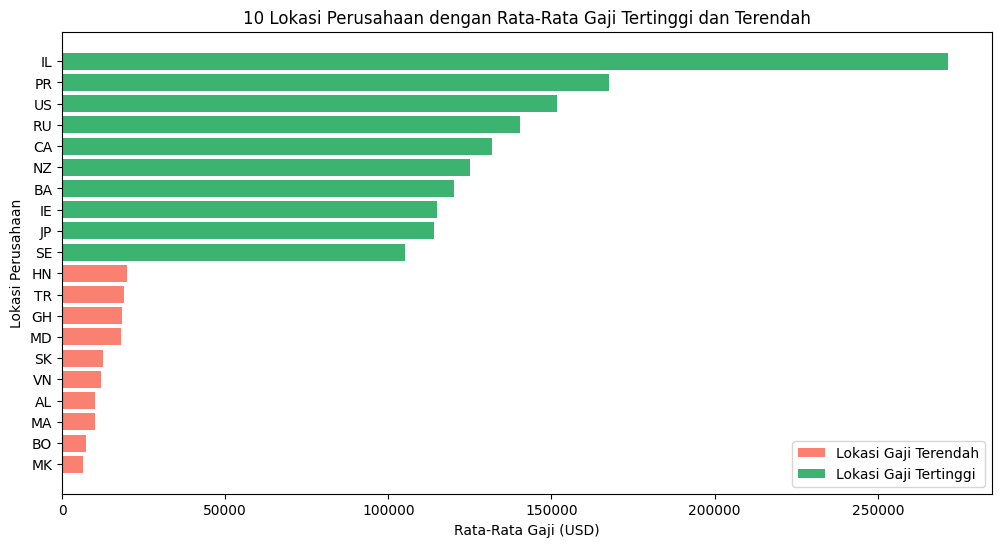

In [373]:
# Visualisasi rata-rata salary_in_usd berdasarkan lokasi perusahaan
rata_rata_gaji = df.groupby('company_location')['salary_in_usd'].mean().sort_values()

lokasi_terendah = rata_rata_gaji.head(10)
lokasi_tertinggi = rata_rata_gaji.tail(10)

plt.figure(figsize=(12, 6))
plt.barh(lokasi_terendah.index, lokasi_terendah.values, color='salmon', label='Lokasi Gaji Terendah')
plt.barh(lokasi_tertinggi.index, lokasi_tertinggi.values, color='mediumseagreen', label='Lokasi Gaji Tertinggi')
plt.xlabel('Rata-Rata Gaji (USD)')
plt.ylabel('Lokasi Perusahaan')
plt.title('10 Lokasi Perusahaan dengan Rata-Rata Gaji Tertinggi dan Terendah')
plt.legend()
plt.show()

In [374]:
# Menghitung gaji rata-rata berdasarkan tingkat remote kerja
df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)

,salary_in_usd
remote_ratio,
0,144316.202288
100,136481.452830
50,78400.687831


In [375]:
# Menghitung jumlah pekerjaan untuk setiap kategori remote
df.groupby('remote_ratio')['job_title'].count().sort_values(ascending=False)

,job_title
remote_ratio,
0,1923
100,1643
50,189


In [376]:
# Menampilkan 10 profesi dengan rata-rata gaji tertinggi
gaji_per_pekerjaan = df.groupby('job_title').agg(rata_rata_gaji=('salary_in_usd', 'mean'))
top_pekerjaan_bergaji_tinggi = gaji_per_pekerjaan.sort_values(by='rata_rata_gaji', ascending=False).head(10)
print(top_pekerjaan_bergaji_tinggi)

                                    rata_rata_gaji
job_title                                         
Data Science Tech Lead               375000.000000
Cloud Data Architect                 250000.000000
Data Lead                            212500.000000
Data Analytics Lead                  211254.500000
Principal Data Scientist             198171.125000
Director of Data Science             195140.727273
Principal Data Engineer              192500.000000
Machine Learning Software Engineer   192420.000000
Data Science Manager                 191278.775862
Applied Scientist                    190264.482759


In [377]:
# Analisis tren rata-rata gaji per tahun
df.groupby('work_year')['salary_in_usd'].mean().sort_values(ascending=False)

,salary_in_usd
work_year,
2023,149045.541176
2022,133338.620793
2021,94087.208696
2020,92302.631579


In [378]:
# Menampilkan 5 jabatan dengan rata-rata gaji tertinggi untuk setiap tahun
for tahun in df['work_year'].unique():
    print(f"5 Posisi dengan Gaji Tertinggi di Tahun {tahun}")

    # Filter data berdasarkan tahun
    data_tahun = df[df['work_year'] == tahun]

    # Hitung rata-rata gaji berdasarkan jabatan
    lima_teratas = (
        data_tahun.groupby('job_title')['salary_in_usd']
        .mean()
        .sort_values(ascending=False)
        .head(5)
    )

    # Format angka agar lebih rapi
    print(lima_teratas.apply(lambda gaji: f"{gaji:,.2f}"))
    print('-' * 50)

5 Posisi dengan Gaji Tertinggi di Tahun 2023
job_title
Director of Data Science    242,728.67
AI Scientist                231,232.50
Head of Data                224,738.67
Computer Vision Engineer    224,240.00
Data Lead                   212,500.00
Name: salary_in_usd, dtype: object
--------------------------------------------------
5 Posisi dengan Gaji Tertinggi di Tahun 2022
job_title
Data Analytics Lead                   405,000.00
Data Science Tech Lead                375,000.00
Research Engineer                     207,870.00
Machine Learning Software Engineer    202,033.33
Marketing Data Analyst                200,000.00
Name: salary_in_usd, dtype: object
--------------------------------------------------
5 Posisi dengan Gaji Tertinggi di Tahun 2020
job_title
Director of Data Science      325,000.00
Machine Learning Scientist    260,000.00
Research Scientist            246,000.00
Data Science Manager          190,200.00
Lead Data Scientist           152,500.00
Name: salary_in_us

In [379]:
# Menampilkan daftar 10 jabatan dengan rata-rata gaji paling rendah
pekerjaan_gaji_terendah = (
    df.groupby('job_title')
    .salary_in_usd.mean()
    .sort_values()
    .head(10)
    .reset_index(name='gaji_rata_rata')
)

# Cetak hasilnya
print(pekerjaan_gaji_terendah)

                            job_title  gaji_rata_rata
0                  Power BI Developer         5409.00
1              Product Data Scientist         8000.00
2                  Staff Data Analyst        15000.00
3       3D Computer Vision Researcher        21352.25
4       Autonomous Vehicle Technician        26277.50
5             Compliance Data Analyst        30000.00
6            Principal Data Architect        38154.00
7  Machine Learning Research Engineer        42819.25
8                     Insight Analyst        46786.00
9                Data DevOps Engineer        53654.00


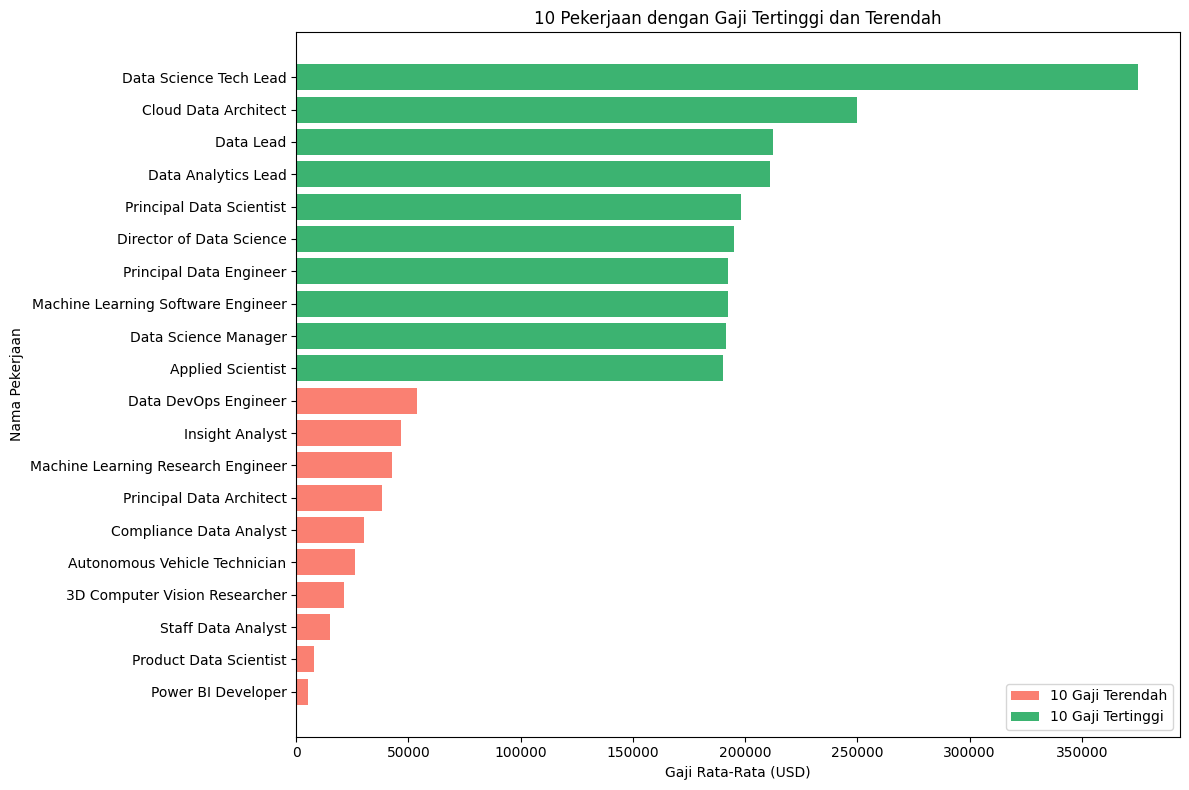

In [380]:
# Visualisasi 10 pekerjaan dengan gaji rata-rata tertinggi dan terendah
rata_gaji_pekerjaan = df.groupby('job_title')['salary_in_usd'].mean().sort_values()

pekerjaan_terendah = rata_gaji_pekerjaan.head(10)
pekerjaan_tertinggi = rata_gaji_pekerjaan.tail(10)

plt.figure(figsize=(12, 8))
plt.barh(pekerjaan_terendah.index, pekerjaan_terendah.values, color='salmon', label='10 Gaji Terendah')
plt.barh(pekerjaan_tertinggi.index, pekerjaan_tertinggi.values, color='mediumseagreen', label='10 Gaji Tertinggi')

plt.xlabel('Gaji Rata-Rata (USD)')
plt.ylabel('Nama Pekerjaan')
plt.title('10 Pekerjaan dengan Gaji Tertinggi dan Terendah')
plt.legend()
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [381]:
df.drop_duplicates(inplace=True)
print(df.shape)

(2584, 11)


In [382]:
# Menghapus kolom yang tidak relevan untuk analisis
df.drop('salary', axis=1, inplace=True)
df.drop('salary_currency', axis=1, inplace=True)

print(df.shape)

(2584, 9)


In [383]:
# Encoding Ordinal untuk level pengalaman dan ukuran perusahaan
df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
df['company_size'] = df['company_size'].replace({'S': 1, 'M': 2, 'L': 3})

# One-Hot Encoding untuk kolom employment_type
tipe_pekerjaan_encoded = pd.get_dummies(df['employment_type'], prefix='tipe_kerja')
df = pd.concat([df, tipe_pekerjaan_encoded], axis=1)
df.drop(columns='employment_type', inplace=True)

# Encoding Frekuensi untuk kolom job_title
df['frekuensi_jabatan'] = df['job_title'].map(df['job_title'].value_counts())
df.drop(columns='job_title', inplace=True)

# Tampilkan 5 data teratas
df.head()

<ipython-input-383-248c810c4f38>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
<ipython-input-383-248c810c4f38>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['company_size'] = df['company_size'].replace({'S': 1, 'M': 2, 'L': 3})


,work_year,experience_level,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,tipe_kerja_CT,tipe_kerja_FL,tipe_kerja_FT,tipe_kerja_PT,frekuensi_jabatan
0,2023,3,85847,ES,100,ES,3,False,False,True,False,8
1,2023,2,30000,US,100,US,1,True,False,False,False,34
2,2023,2,25500,US,100,US,1,True,False,False,False,34
3,2023,3,175000,CA,100,CA,2,False,False,True,False,538
4,2023,3,120000,CA,100,CA,2,False,False,True,False,538


In [384]:
print(df.shape)

(2584, 12)


In [385]:
# Pastikan kolom masih ada sebelum diproses
if 'employee_residence' in df.columns:
    freq_residence = df['employee_residence'].value_counts()
    df['employee_residence_encoded'] = df['employee_residence'].map(freq_residence)
    df.drop('employee_residence', axis=1, inplace=True)

if 'company_location' in df.columns:
    freq_location = df['company_location'].value_counts()
    df['company_location_encoded'] = df['company_location'].map(freq_location)
    df.drop('company_location', axis=1, inplace=True)

# Cek hasilnya
print(df[['employee_residence_encoded', 'company_location_encoded']].head())

   employee_residence_encoded  company_location_encoded
0                          47                        44
1                        1893                      1929
2                        1893                      1929
3                          81                        83
4                          81                        83


In [386]:
# Cek missing values per kolom
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

Missing values per kolom:
 work_year                     0
experience_level              0
salary_in_usd                 0
remote_ratio                  0
company_size                  0
tipe_kerja_CT                 0
tipe_kerja_FL                 0
tipe_kerja_FT                 0
tipe_kerja_PT                 0
frekuensi_jabatan             0
employee_residence_encoded    0
company_location_encoded      0
dtype: int64


In [387]:
# Scaling Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [388]:
# Menetapkan jumlah klaster yang diinginkan
total_klaster = 6

# Inisialisasi dan pelatihan model KMeans
kmeans_model = KMeans(n_clusters=total_klaster, random_state=42)
hasil_klaster = kmeans_model.fit_predict(scaled_data)

# Menghitung nilai Silhouette untuk menilai kualitas klastering
nilai_silhouette = silhouette_score(scaled_data, hasil_klaster)
print(f"Nilai Silhouette untuk {total_klaster} klaster: {nilai_silhouette:.4f}")

Nilai Silhouette untuk 6 klaster: 0.2513


Saya memilih K-means karena algoritma ini efisien dalam mengelompokkan data berdasarkan kesamaan fitur. Dengan kesederhanaan dan kecepatan dalam pelatihan, K-means cocok untuk dataset besar dan memungkinkan interpretasi yang mudah ketika jumlah kluster sudah diketahui.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

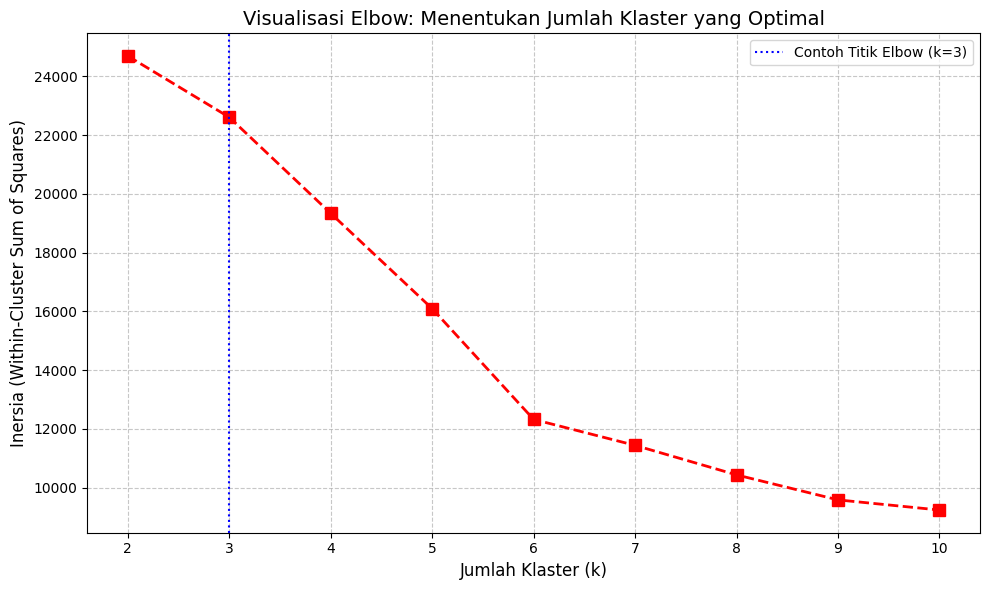

In [389]:
# Menyimpan nilai inersia untuk setiap jumlah klaster
daftar_inersia = []
jumlah_klaster = range(2, 11)

for k in jumlah_klaster:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    daftar_inersia.append(kmeans.inertia_)

# Membuat visualisasi Elbow
plt.figure(figsize=(10, 6))
plt.plot(jumlah_klaster, daftar_inersia, 's--r', linewidth=2, markersize=8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(jumlah_klaster)
plt.title('Visualisasi Elbow: Menentukan Jumlah Klaster yang Optimal', fontsize=14)
plt.xlabel('Jumlah Klaster (k)', fontsize=12)
plt.ylabel('Inersia (Within-Cluster Sum of Squares)', fontsize=12)
plt.axvline(x=3, color='blue', linestyle=':', label='Contoh Titik Elbow (k=3)')
plt.legend()
plt.tight_layout()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

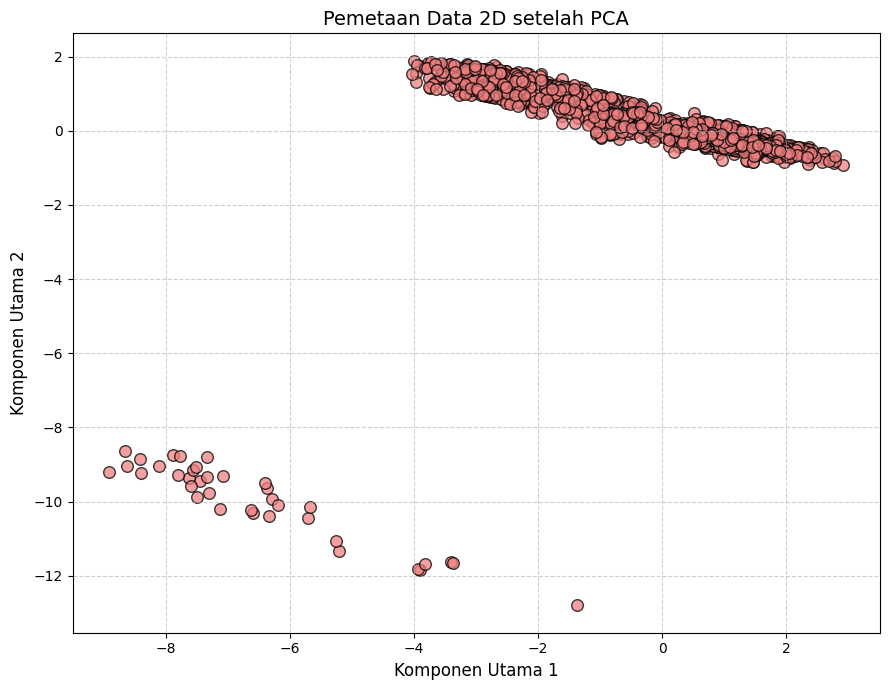

In [390]:
# Melakukan reduksi dimensi
pca = PCA(n_components=2)
data_pca_2d = pca.fit_transform(scaled_data)

# Visualisasi hasil
plt.figure(figsize=(9, 7))
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1],
            c='lightcoral', edgecolors='black', s=70, alpha=0.75)
plt.title("Pemetaan Data 2D setelah PCA", fontsize=14)
plt.xlabel("Komponen Utama 1", fontsize=12)
plt.ylabel("Komponen Utama 2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

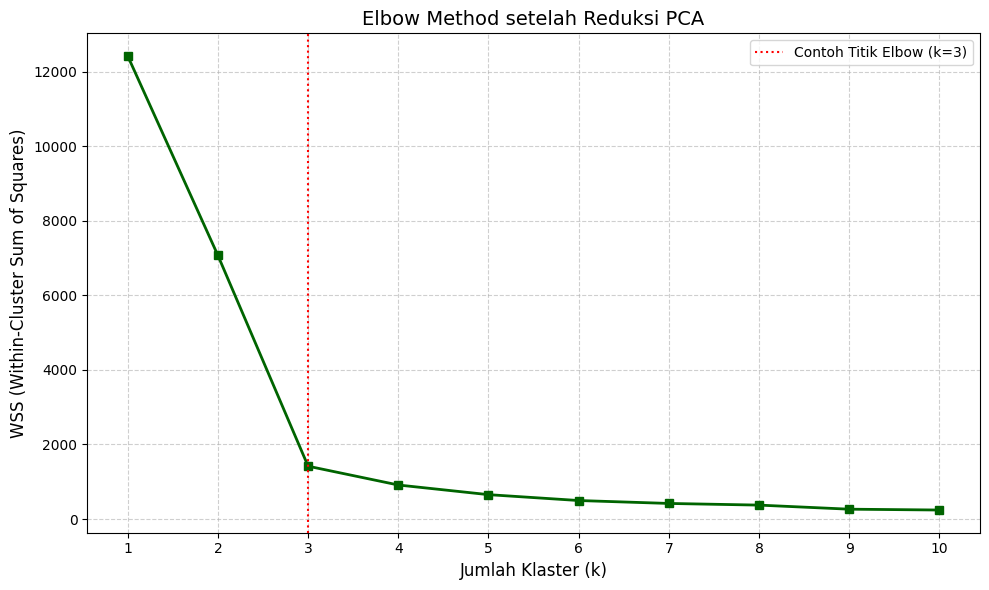

In [391]:
# Menentukan nilai Within-Cluster Sum of Squares (WSS) untuk berbagai jumlah klaster
wss_values = []
range_klaster = range(1, 11)

for k in range_klaster:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(data_pca_2d)
    wss_values.append(kmeans_pca.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(range_klaster, wss_values, marker='s', linestyle='-', color='darkgreen', linewidth=2)
plt.title('Elbow Method setelah Reduksi PCA', fontsize=14)
plt.xlabel('Jumlah Klaster (k)', fontsize=12)
plt.ylabel('WSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range_klaster)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=3, linestyle=':', color='red', label='Contoh Titik Elbow (k=3)')
plt.legend()
plt.tight_layout()
plt.show()


In [392]:
# Menerapkan algoritma KMeans pada data hasil PCA
model_klaster = KMeans(n_clusters=3, random_state=42)
label_klaster = model_klaster.fit_predict(data_pca_2d)

# Menghitung nilai Silhouette sebagai evaluasi klastering
skor_silhouette = silhouette_score(data_pca_2d, label_klaster)
print(f"Skor Silhouette pada data hasil reduksi PCA: {skor_silhouette:.4f}")

Skor Silhouette pada data hasil reduksi PCA: 0.7424


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

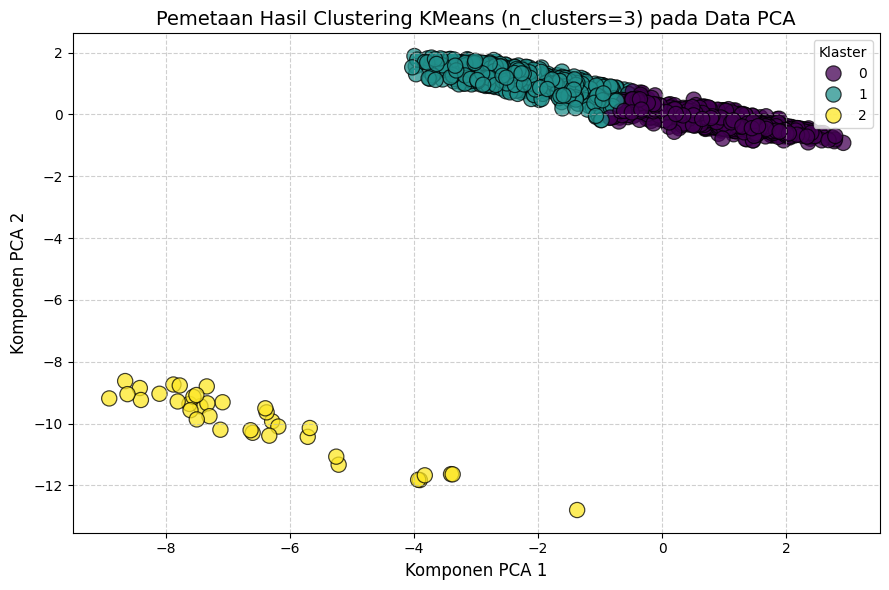

In [393]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_pca_2d)

plt.figure(figsize=(9, 6))
sns.scatterplot(x=data_pca_2d[:, 0], y=data_pca_2d[:, 1],
                hue=cluster_labels, palette='viridis', s=120, alpha=0.75, edgecolor='black')

plt.title(f'Pemetaan Hasil Clustering KMeans (n_clusters={n_clusters}) pada Data PCA', fontsize=14)
plt.xlabel('Komponen PCA 1', fontsize=12)
plt.ylabel('Komponen PCA 2', fontsize=12)
plt.legend(title='Klaster', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [394]:
# Tambahkan label klaster ke DataFrame
df['cluster'] = cluster_labels

In [395]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('cluster', axis=1))

In [396]:
df_scaled = pd.DataFrame(scaled_data, columns=df.drop('cluster', axis=1).columns)
df_scaled['cluster'] = cluster_labels

In [397]:
inverse_data = scaler.inverse_transform(df_scaled.drop('cluster', axis=1))
df_inverse = pd.DataFrame(inverse_data, columns=df.drop('cluster', axis=1).columns)
df_inverse['cluster'] = cluster_labels

In [398]:
cluster_stats = df_inverse.groupby('cluster').mean()
print("Rata-rata Fitur per Cluster:")
print(tabulate(cluster_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))

# Visualisasi
plt.figure(figsize=(15, 10))

Rata-rata Fitur per Cluster:
╒═══════════╤═════════════╤════════════════════╤═════════════════╤════════════════╤════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════════╤══════════════════════════════╤════════════════════════════╕
│   cluster │   work_year │   experience_level │   salary_in_usd │   remote_ratio │   company_size │   tipe_kerja_CT │   tipe_kerja_FL │   tipe_kerja_FT │   tipe_kerja_PT │   frekuensi_jabatan │   employee_residence_encoded │   company_location_encoded │
╞═══════════╪═════════════╪════════════════════╪═════════════════╪════════════════╪════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════╪═════════════════════╪══════════════════════════════╪════════════════════════════╡
│         0 │     2022.46 │               2.75 │       156424.10 │          46.60 │           2.08 │            0.00 │            0.00 │            1.00 │            0.00 │              355.50 │            

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

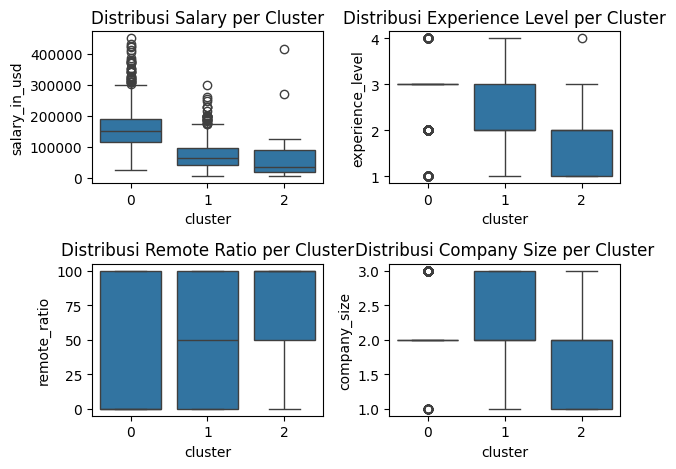

In [399]:
plt.subplot(2, 2, 1)
sns.boxplot(x='cluster', y='salary_in_usd', data=df_inverse)
plt.title('Distribusi Salary per Cluster')

plt.subplot(2, 2, 2)
sns.boxplot(x='cluster', y='experience_level', data=df_inverse)
plt.title('Distribusi Experience Level per Cluster')

plt.subplot(2, 2, 3)
sns.boxplot(x='cluster', y='remote_ratio', data=df_inverse)
plt.title('Distribusi Remote Ratio per Cluster')

plt.subplot(2, 2, 4)
sns.boxplot(x='cluster', y='company_size', data=df_inverse)
plt.title('Distribusi Company Size per Cluster')
plt.tight_layout()
plt.show()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [400]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('cluster', axis=1))

In [401]:
numeric_cols = ['work_year', 'salary_in_usd', 'remote_ratio',
               'experience_level', 'company_size', 'frekuensi_jabatan',
               'employee_residence_encoded', 'company_location_encoded']

In [402]:
inverse_data = scaler.inverse_transform(df_scaled.drop('cluster', axis=1))

In [403]:
df_scaled = pd.DataFrame(scaled_data, columns=df.drop('cluster', axis=1).columns)
df_scaled['cluster'] = df['cluster']

In [404]:
inverse_data = scaler.inverse_transform(df_scaled.drop('cluster', axis=1))

In [405]:
df_inverse = pd.DataFrame(inverse_data, columns=df.drop('cluster', axis=1).columns)
df_inverse['cluster'] = df['cluster']

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [406]:
mode_categorical = df_inverse.groupby('cluster')[['remote_ratio', 'salary_in_usd', 'experience_level', 'company_size']].agg(lambda x: x.mode()[0])
print("Modus Fitur Kategorikal per Cluster:")
print(mode_categorical.to_markdown())

Modus Fitur Kategorikal per Cluster:
|   cluster |   remote_ratio |   salary_in_usd |   experience_level |   company_size |
|----------:|---------------:|----------------:|-------------------:|---------------:|
|         0 |              0 |          120000 |                  3 |              2 |
|         1 |            100 |          100000 |                  3 |              2 |
|         2 |            100 |           25500 |                  2 |              2 |


In [407]:
mean_numerical = df_inverse.groupby('cluster')[['remote_ratio', 'salary_in_usd', 'experience_level', 'company_size']].mean()
print("\nRata-rata Fitur Numerik per Cluster:")
print(mean_numerical.to_markdown())


Rata-rata Fitur Numerik per Cluster:
|   cluster |   remote_ratio |   salary_in_usd |   experience_level |   company_size |
|----------:|---------------:|----------------:|-------------------:|---------------:|
|         0 |        48.3648 |        135776   |            2.58067 |        2.10029 |
|         1 |        56.3694 |        131246   |            2.61146 |        2.1242  |
|         2 |        70.8333 |         89997.6 |            2.33333 |        2       |


In [408]:
# Jumlah data per cluster
print("Jumlah data per cluster:")
print(df_inverse['cluster'].value_counts())

Jumlah data per cluster:
cluster
0.0    1376
1.0     314
2.0      12
Name: count, dtype: int64


In [409]:
#Interpretasi Cluster
print("\nInterpretasi Cluster:")

df_inverse = df_inverse[df_inverse['cluster'].notna()]
df_inverse['cluster'] = df_inverse['cluster'].astype(int)

for cluster in sorted(df_inverse['cluster'].unique()):
    cluster_data = df_inverse[df_inverse['cluster'] == cluster]

    print(f"\nCluster {cluster}:")
    print(f"- Jumlah anggota: {len(cluster_data)}")
    print(f"- Rata-rata gaji (USD): ${cluster_data['salary_in_usd'].mean():,.2f}")
    print(f"- Rata-rata experience level: {cluster_data['experience_level'].mean():.2f} (1=EN, 2=MI, 3=SE, 4=EX)")
    print(f"- Rata-rata remote ratio: {cluster_data['remote_ratio'].mean():.2f}%")
    print(f"- Rata-rata ukuran perusahaan: {cluster_data['company_size'].mean():.2f} (1=S, 2=M, 3=L)")

    if cluster_data['salary_in_usd'].mean() > df_inverse['salary_in_usd'].mean():
        print("  * Kelompok dengan gaji di atas rata-rata")
    else:
        print("  * Kelompok dengan gaji di bawah rata-rata")


Interpretasi Cluster:

Cluster 0:
- Jumlah anggota: 1376
- Rata-rata gaji (USD): $135,775.89
- Rata-rata experience level: 2.58 (1=EN, 2=MI, 3=SE, 4=EX)
- Rata-rata remote ratio: 48.36%
- Rata-rata ukuran perusahaan: 2.10 (1=S, 2=M, 3=L)
  * Kelompok dengan gaji di atas rata-rata

Cluster 1:
- Jumlah anggota: 314
- Rata-rata gaji (USD): $131,246.08
- Rata-rata experience level: 2.61 (1=EN, 2=MI, 3=SE, 4=EX)
- Rata-rata remote ratio: 56.37%
- Rata-rata ukuran perusahaan: 2.12 (1=S, 2=M, 3=L)
  * Kelompok dengan gaji di bawah rata-rata

Cluster 2:
- Jumlah anggota: 12
- Rata-rata gaji (USD): $89,997.58
- Rata-rata experience level: 2.33 (1=EN, 2=MI, 3=SE, 4=EX)
- Rata-rata remote ratio: 70.83%
- Rata-rata ukuran perusahaan: 2.00 (1=S, 2=M, 3=L)
  * Kelompok dengan gaji di bawah rata-rata


<ipython-input-409-348ffb937a34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inverse['cluster'] = df_inverse['cluster'].astype(int)


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Jumlah anggota: 1376
- Rata-rata gaji (USD): $135,775.89
- Rata-rata experience level: 2.58 (1=EN, 2=MI, 3=SE, 4=EX)

- Rata-rata remote ratio: 48.36%
- Rata-rata ukuran perusahaan: 2.10 (1=S, 2=M, 3=L)
- Kelompok dengan gaji di atas rata-rata
- **Analisis**: Cluster 0 merupakan kelompok dengan jumlah anggota terbanyak, yaitu 1376 orang. Rata-rata gaji pada cluster ini mencapai $135,775.89, yang merupakan gaji tertinggi di antara semua klaster, menempatkannya sebagai kelompok dengan gaji di atas rata-rata. Tingkat pengalaman rata-rata berada di angka 2.58, yang menunjukkan bahwa mayoritas anggotanya berada pada level Mid (MI) hingga Senior (SE). Rasio kerja remote pada klaster ini sebesar 48.36%, dan ukuran perusahaan rata-rata adalah 2.10, yang mengindikasikan kecenderungan bekerja di perusahaan berskala kecil hingga menengah. Klaster ini bisa jadi menggambarkan tenaga kerja yang berpengalaman, bekerja di perusahaan dengan skala tertentu, dan tidak seluruhnya menerapkan sistem kerja remote.


## Cluster 1:
- Jumlah anggota: 314
- Rata-rata gaji (USD): $131,246.08

- Rata-rata experience level: 2.61 (1=EN, 2=MI, 3=SE, 4=EX)
- Rata-rata remote ratio: 56.37%
- Rata-rata ukuran perusahaan: 2.12 (1=S, 2=M, 3=L)
- Kelompok dengan gaji di bawah rata-rata
- **Analisis**: Cluster 1 terdiri dari 314 anggota dengan rata-rata gaji $131,246.08, sedikit lebih rendah dibanding Cluster 0, dan dikategorikan sebagai kelompok dengan gaji di bawah rata-rata. Namun, tingkat pengalaman rata-ratanya sedikit lebih tinggi (2.61), serta rasio kerja remote yang juga lebih tinggi, mencapai 56.37%. Ukuran perusahaan rata-rata di klaster ini adalah 2.12, hampir setara dengan Cluster 0. Fakta ini menunjukkan bahwa meskipun anggotanya sedikit lebih berpengalaman dan lebih banyak bekerja secara remote, namun mereka masih menerima kompensasi yang sedikit lebih rendah. Ini bisa mengindikasikan bahwa remote working belum tentu selalu berkorelasi dengan gaji yang lebih tinggi, atau bisa juga karena bidang industri atau jenis pekerjaannya berbeda.

## Cluster 2:
- Jumlah anggota: 12
- Rata-rata gaji (USD): $89,997.58

- Rata-rata experience level: 2.33 (1=EN, 2=MI, 3=SE, 4=EX)
- Rata-rata remote ratio: 70.83%
- Rata-rata ukuran perusahaan: 2.00 (1=S, 2=M, 3=L)
- Kelompok dengan gaji di bawah rata-rata
- **Analisis**: Cluster ini merupakan klaster terkecil dengan hanya 12 anggota. Rata-rata gaji di kelompok ini adalah yang terendah, yakni $89,997.58. Tingkat pengalaman mereka pun paling rendah (2.33), mengindikasikan dominasi pada level Mid (MI). Namun, kelompok ini memiliki rasio kerja remote tertinggi yaitu 70.83%, serta bekerja di perusahaan dengan ukuran terkecil secara rata-rata (2.00). Dari sini dapat dilihat bahwa cluster ini terdiri dari tenaga kerja dengan pengalaman dan gaji paling rendah, namun memiliki kecenderungan sangat tinggi untuk bekerja secara remote, kemungkinan besar dalam pengaturan kerja yang lebih fleksibel atau informal seperti startup kecil atau kontraktor lepas.

**Kesimpulan** : Secara keseluruhan, analisis ini menunjukkan adanya korelasi yang menarik antara pengalaman, gaji, jenis kerja (remote), dan ukuran perusahaan. Cluster dengan gaji tertinggi (Cluster 0) tidak memiliki rasio kerja remote yang tinggi, sementara cluster dengan kerja remote tertinggi (Cluster 2) justru memiliki gaji dan pengalaman paling rendah. Ini dapat menjadi masukan penting dalam strategi rekrutmen dan kompensasi, khususnya dalam menilai peran kerja remote terhadap gaji dan profil pekerja.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [412]:
df['Cluster'] = kmeans.labels_

df.to_csv('hasil_clustering.csv', index=False)

print("Data berhasil diekspor ke 'hasil_clustering.csv'")

Data berhasil diekspor ke 'hasil_clustering.csv'


In [413]:
from google.colab import files
files.download('hasil_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [417]:
!pip freeze > requirement.txt